In [1]:
## ref: https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value

In [2]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
auto_df = pd.read_csv('Data/autos.csv', sep=',', header=0, encoding='cp1252')
auto_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
auto_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
dateCrawled            371528 non-null object
name                   371528 non-null object
seller                 371528 non-null object
offerType              371528 non-null object
price                  371528 non-null int64
abtest                 371528 non-null object
vehicleType            333659 non-null object
yearOfRegistration     371528 non-null int64
gearbox                351319 non-null object
powerPS                371528 non-null int64
model                  351044 non-null object
kilometer              371528 non-null int64
monthOfRegistration    371528 non-null int64
fuelType               338142 non-null object
brand                  371528 non-null object
notRepairedDamage      299468 non-null object
dateCreated            371528 non-null object
nrOfPictures           371528 non-null int64
postalCode             371528 non-null int64
lastSeen              

In [5]:
auto_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [6]:
auto_df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
## lots of null values in vehicle Type, gearbox,  model, fueltype, not repaired damage

In [8]:
# check unique values

In [9]:
auto_df.nunique()

dateCrawled            280500
name                   233531
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 8
yearOfRegistration        155
gearbox                     2
powerPS                   794
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen               182806
dtype: int64

In [10]:
df_unique = auto_df.nunique()
df_unique

dateCrawled            280500
name                   233531
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 8
yearOfRegistration        155
gearbox                     2
powerPS                   794
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen               182806
dtype: int64

In [11]:
df_unique[df_unique<=2]

seller               2
offerType            2
abtest               2
gearbox              2
notRepairedDamage    2
nrOfPictures         1
dtype: int64

In [12]:
lst_to_drop = df_unique[df_unique<=2].index.tolist()
lst_to_drop

['seller',
 'offerType',
 'abtest',
 'gearbox',
 'notRepairedDamage',
 'nrOfPictures']

In [13]:
auto_df.drop(lst_to_drop, axis = 1, inplace =True )
auto_df.head()

,dateCrawled,name,price,vehicleType,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,480,NaN,1993,0,golf,150000,0,benzin,volkswagen,2016-03-24 00:00:00,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,18300,coupe,2011,190,NaN,125000,5,diesel,audi,2016-03-24 00:00:00,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,163,grand,125000,8,diesel,jeep,2016-03-14 00:00:00,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,75,golf,150000,6,benzin,volkswagen,2016-03-17 00:00:00,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,69,fabia,90000,7,diesel,skoda,2016-03-31 00:00:00,60437,2016-04-06 10:17:21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1171dc2e8>,
      dtype=object)

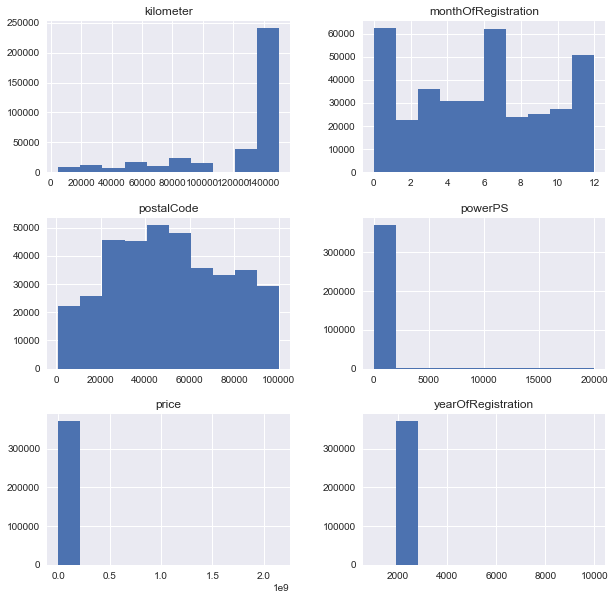

In [14]:
## plot histogram
auto_df.hist(figsize=(10,10))

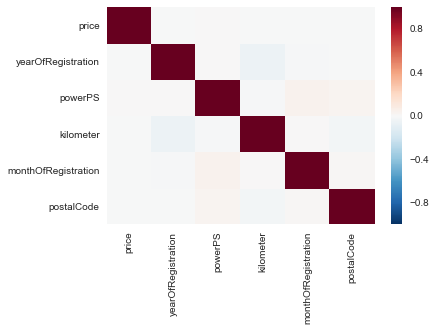

In [15]:
sns.heatmap(auto_df.corr())


In [16]:
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

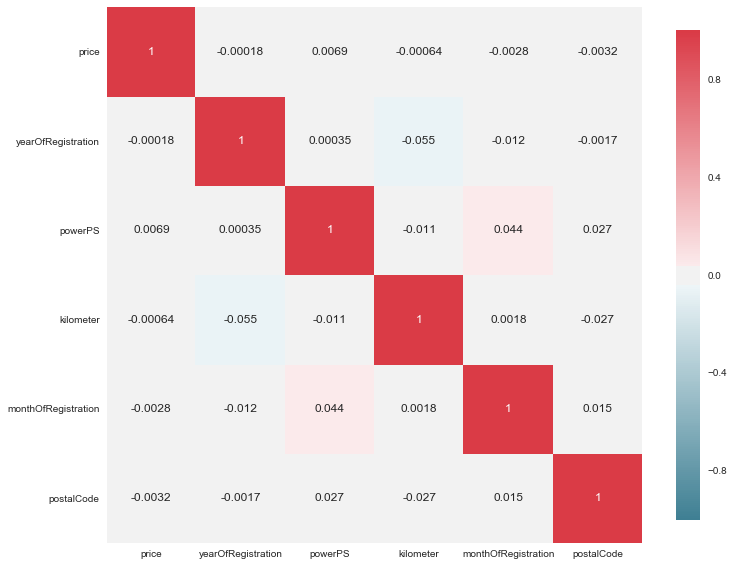

In [17]:
plot_correlation_map(auto_df)

In [18]:
## data cleaning

In [19]:
print("Too new: %d" % auto_df.loc[auto_df.yearOfRegistration >= 2017].count()['name'])
print("Too old: %d" % auto_df.loc[auto_df.yearOfRegistration < 1950].count()['name'])
print("Too cheap: %d" % auto_df.loc[auto_df.price < 100].count()['name'])
print("Too expensive: " , auto_df.loc[auto_df.price > 150000].count()['name'])
print("Too few km: " , auto_df.loc[auto_df.kilometer < 5000].count()['name'])
print("Too many km: " , auto_df.loc[auto_df.kilometer > 200000].count()['name'])
print("Too few PS: " , auto_df.loc[auto_df.powerPS < 10].count()['name'])
print("Too many PS: " , auto_df.loc[auto_df.powerPS > 500].count()['name'])
print("Fuel types: " , auto_df['fuelType'].unique())
#print("Offer types: " , df['offerType'].unique())
#print("Sellers: " , df['seller'].unique())
#print("Damages: " , auto_df['notRepairedDamage'].unique())
#print("Pics: " , df['nrOfPictures'].unique()) # nrOfPictures : number of pictures in the ad (unfortunately this field contains everywhere a 0 and is thus useless (bug in crawler!) )
#print("Postale codes: " , df['postalCode'].unique())
print("Vehicle types: " , auto_df['vehicleType'].unique())
print("Brands: " , auto_df['brand'].unique())

# Cleaning data
#valid_models = df.dropna()

#### Removing the duplicates
dedups = auto_df.drop_duplicates(['name','price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

#### Removing the outliers
dedups = dedups[
        (dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1950) 
      & (dedups.price >= 100) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 10) 
      & (dedups.powerPS <= 500)]

print("-----------------\nData kept for analisys: %d percent of the entire set\n-----------------" % (100 * dedups['name'].count() / auto_df['name'].count()))


Too new: 14680
Too old: 289
Too cheap: 13320
Too expensive:  232
Too few km:  0
Too many km:  0
Too few PS:  41040
Too many PS:  835
Fuel types:  ['benzin' 'diesel' nan 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
Vehicle types:  [nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
Brands:  ['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']
-----------------
Data kept for analisys: 81 percent of the entire set
-----------------


In [20]:
dedups.isnull().sum()

dateCrawled                0
name                       0
price                      0
vehicleType            10806
yearOfRegistration         0
powerPS                    0
model                  11335
kilometer                  0
monthOfRegistration        0
fuelType               15388
brand                      0
dateCreated                0
postalCode                 0
lastSeen                   0
dtype: int64

In [21]:
## null values could be set as 'not declared'

In [22]:
#dedups['notRepairedDamage'].fillna(value='not-declared', inplace=True)
dedups['fuelType'].fillna(value='not-declared', inplace=True)
#dedups['gearbox'].fillna(value='not-declared', inplace=True)
dedups['vehicleType'].fillna(value='not-declared', inplace=True)
dedups['model'].fillna(value='not-declared', inplace=True)
dedups.isnull().sum()

dateCrawled            0
name                   0
price                  0
vehicleType            0
yearOfRegistration     0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

In [23]:
## Visualization

powerPS
75     21552
60     14361
150    14092
140    12570
101    12118
Name: powerPS, dtype: int64


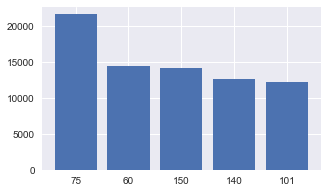

model
golf            24802
andere          21708
3er             17665
not-declared    11335
polo            10462
Name: model, dtype: int64


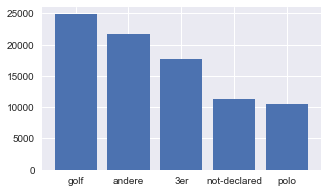

brand
volkswagen       64747
bmw              34379
opel             31689
mercedes_benz    29515
audi             27929
Name: brand, dtype: int64


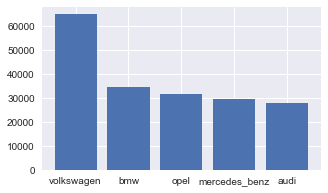

vehicleType
limousine     84686
kleinwagen    68288
kombi         59734
bus           26955
cabrio        20897
Name: vehicleType, dtype: int64


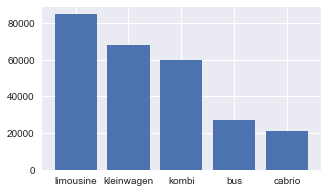

fuelType
benzin          189560
diesel           93152
not-declared     15388
lpg               4640
cng                474
Name: fuelType, dtype: int64


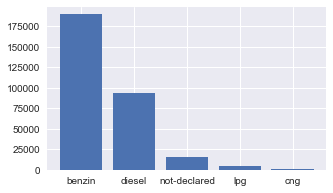

In [24]:
categories = ['powerPS','model', 'brand', 'vehicleType', 'fuelType']

for i, c in enumerate(categories):
    v = dedups[c].unique()
    
    g = dedups.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

In [25]:
## feature engineering 

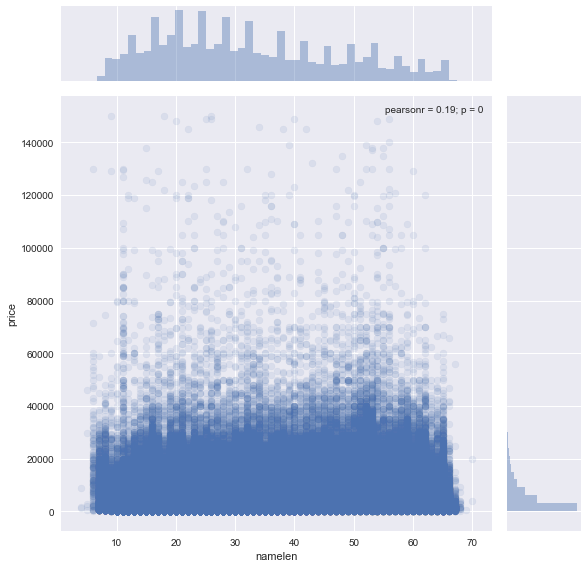

In [26]:
# check if length of name impacts price
dedups['namelen'] = [min(70, len(n)) for n in dedups['name']]

ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
                    alpha=0.1, 
                    size=8)

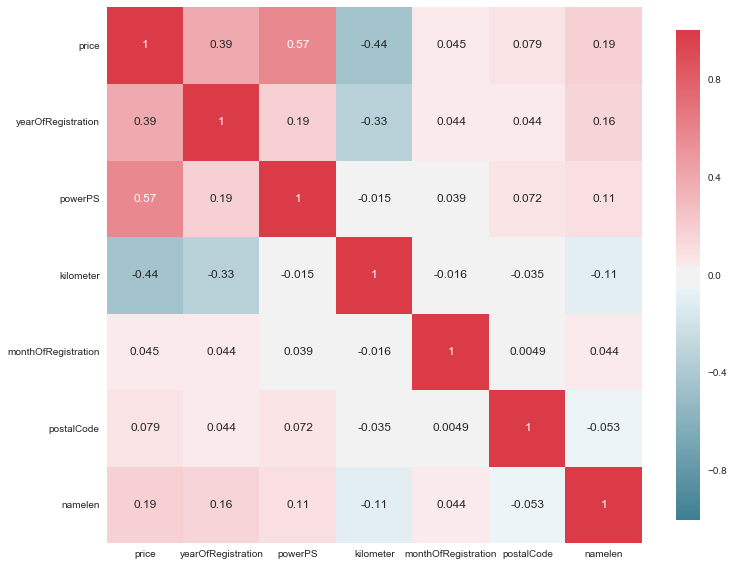

In [27]:
plot_correlation_map(dedups)

In [28]:
## correaltion has improved between year of registration, powerPS and Price

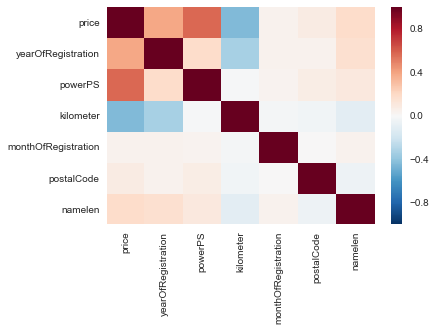

In [29]:
sns.heatmap(dedups.corr())

In [30]:
dedups.columns

Index(['dateCrawled', 'name', 'price', 'vehicleType', 'yearOfRegistration',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'dateCreated', 'postalCode', 'lastSeen', 'namelen'],
      dtype='object')

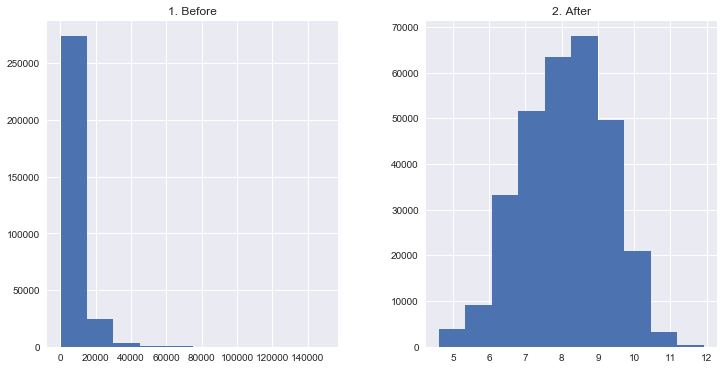

In [31]:
##  split data for model training
Y = dedups['price']
X = dedups[['yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        , 'namelen']]


plt.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist()

Y = np.log1p(Y)

In [32]:
## Build Model
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score, train_test_split

def cv_rmse(model, x, y):
    r = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return r

# Percent of the X array to use as training set. This implies that the rest will be test set
test_size = .33

#Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=test_size, random_state = 3)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

r = range(2003, 2017)
km_year = 10000




(203418, 5) (100191, 5) (203418,) (100191,)


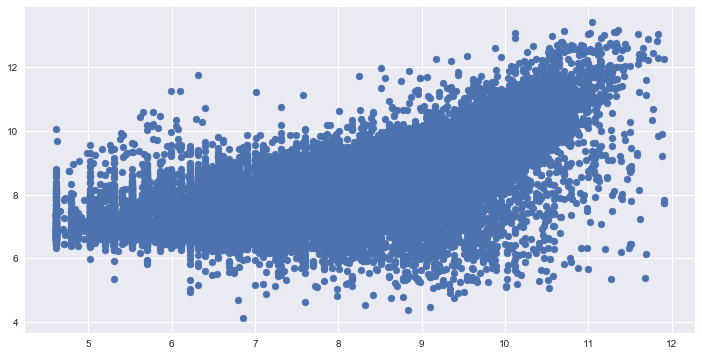

In [33]:
lr_ridge = Ridge()
lr_ridge.fit(X_train, y_train)
prediction = lr_ridge.predict(X_val)

plt.scatter(y_val, prediction)

In [34]:
print(cv_rmse(lr_ridge,X_val,y_val))

[0.76415433 0.78000358 0.76999875 0.77278297 0.75871048]


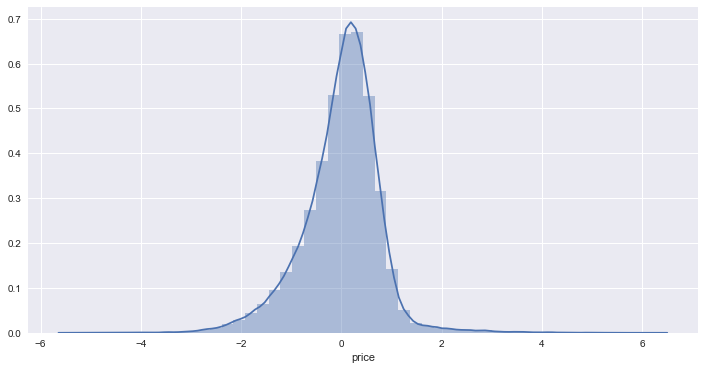

In [35]:
## residual plot
sns.distplot((y_val - prediction ), bins =50)

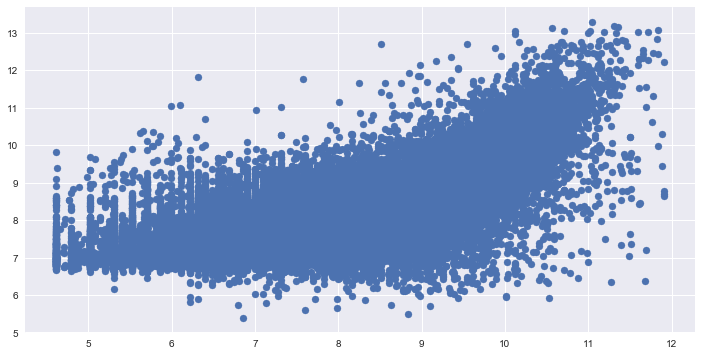

In [36]:
## lasso
lr_lasso = Lasso()
lr_lasso.fit(X_train, y_train)
prediction = lr_lasso.predict(X_val)

plt.scatter(y_val, prediction)

In [37]:
print(cv_rmse(lr_lasso,X_val,y_val))

[0.78530206 0.79937    0.78709676 0.78756788 0.7839871 ]


[0.76415433 0.78000358 0.76999875 0.77278297 0.75871047]


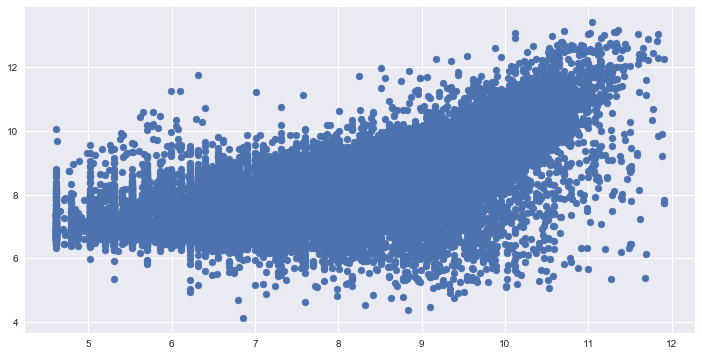

In [38]:
## linear regression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
prediction = lr_reg.predict(X_val)


print(cv_rmse(lr_reg,X_val,y_val))

plt.scatter(y_val, prediction)



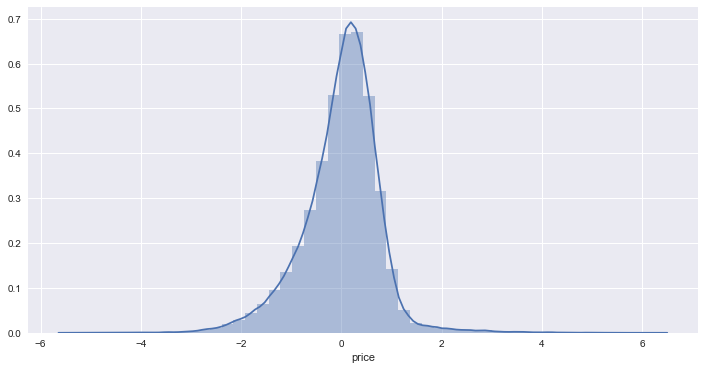

In [39]:
## residual plot
sns.distplot((y_val - prediction ), bins =50)

In [40]:
## compare wih random fores

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [3]
              , "min_samples_split" : [3]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=1)
gs = gs.fit(X_train, y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.7min finished


In [42]:
#Predicting samples
print(gs.best_score_)
print(gs.best_params_)
 

0.7739687585648384
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [43]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_val, y_val))

Score: 0.78


In [44]:
## feature importance

Feature ranking:
1. feature 0 (0.692999)
2. feature 1 (0.268413)
3. feature 2 (0.027398)
4. feature 3 (0.006407)
5. feature 4 (0.004783)
['yearOfRegistration' 'powerPS' 'kilometer' 'monthOfRegistration'
 'namelen']


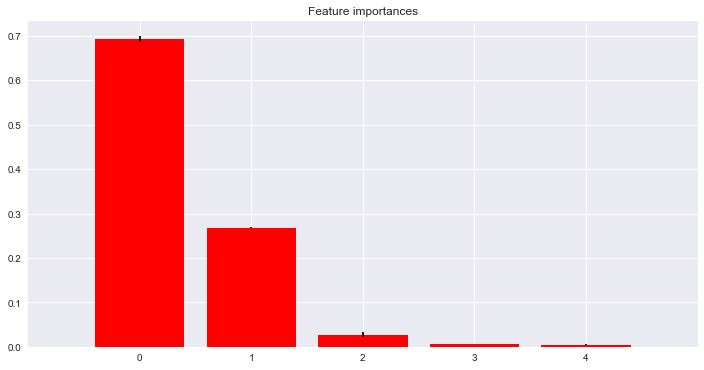

In [45]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

print(X_train.columns.values)
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()